In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
!apt install python3-pipb
!pip install pandas
import pandas as pd
pd.__version__

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package python3-pipb


'1.0.1'

In [7]:
from tensorflow import keras as ks
ks.__version__

'2.2.4-tf'

In [8]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.__version__

'2.1.0'

In [9]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [10]:
sess = tf.compat.v1.Session(target='', graph=None, config=None)
devices = sess.list_devices()
for d in devices:
    print(d.name)

/job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:XLA_CPU:0


In [11]:
df = pd.read_csv('./data/customer-data.csv', sep=';')
y=df['happinesGrade']
df.drop('happinesGrade', axis='columns', inplace=True)
X = df.to_numpy()
X

array([[   5,  500,  250,    5,    1,   20,   19,    3,    1,    3],
       [   5,  300,  100,    3,    2,    5,    3,    2,    1,    5],
       [   3,  800,   80,    4,    3,   30,   15,    3,    3,    1],
       [   2, 1800,  500,    2,    1,   16,   11,    1,    1,    2],
       [   1,  800,  800,    4,    4,   11,   11,    3,    3,    4],
       [   1,  900,  900,    6,    6,   17,   17,    5,    5,    3]])

In [12]:
y

0    4
1    5
2    3
3    2
4    5
5    1
Name: happinesGrade, dtype: int64

In [13]:
!pip install sklearn
import sklearn as sk
sk.__version__

'0.22.2.post1'

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3, 10), (3,), (3, 10), (3,))

In [15]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

num_categories = 10
dropout = 0.1
model = ks.Sequential()

model.add(Dense(100, name='hidden1', input_dim=10))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(100, name='hidden2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_categories, name='softmax', activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 100)               1100      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0

In [16]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

def plot_history(history, samples=100, init_phase_samples=None, plot_line=False):
    epochs = history.params['epochs']
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    every_sample =  int(epochs / samples)
    acc = pd.DataFrame(acc).iloc[::every_sample, :]
    val_acc = pd.DataFrame(val_acc).iloc[::every_sample, :]
    loss = pd.DataFrame(loss).iloc[::every_sample, :]
    val_loss = pd.DataFrame(val_loss).iloc[::every_sample, :]

    if init_phase_samples:
        acc = acc.loc[init_phase_samples:]
        val_acc = val_acc.loc[init_phase_samples:]
        loss = loss.loc[init_phase_samples:]
        val_loss = val_loss.loc[init_phase_samples:]
    
    fig, ax = plt.subplots(nrows=2, figsize=(20,10))

    ax[0].plot(acc, 'bo', label='Training acc')
    ax[0].plot(val_acc, 'b', label='Validation acc')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    
    if plot_line:
        x, y, _ = linear_regression(acc)
        ax[0].plot(x, y, 'bo', color='red')
        x, y, _ = linear_regression(val_acc)
        ax[0].plot(x, y, 'b', color='red')
    
    ax[1].plot(loss, 'bo', label='Training loss')
    ax[1].plot(val_loss, 'b', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    
    if plot_line:
        x, y, _ = linear_regression(loss)
        ax[1].plot(x, y, 'bo', color='red')
        x, y, _ = linear_regression(val_loss)
        ax[1].plot(x, y, 'b', color='red')
    
from sklearn import linear_model

def linear_regression(data):
    x = np.array(data.index).reshape(-1, 1)
    y = data.values.reshape(-1, 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    y_pred = regr.predict(x)
    return x, y_pred, regr.coef_

In [17]:
BATCH_SIZE=1000
EPOCHS = 2000

%time history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0)

CPU times: user 14.9 s, sys: 4.57 s, total: 19.5 s
Wall time: 17.2 s


In [18]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE)
train_loss, train_accuracy

3/3 [==============================] - 0s 1ms/sample - loss: 13.8068 - accuracy: 0.6667


(13.806796073913574, 0.6666667)

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
test_loss, test_accuracy

3/3 [==============================] - 0s 2ms/sample - loss: 17.2948 - accuracy: 0.0000e+00


(17.29482078552246, 0.0)

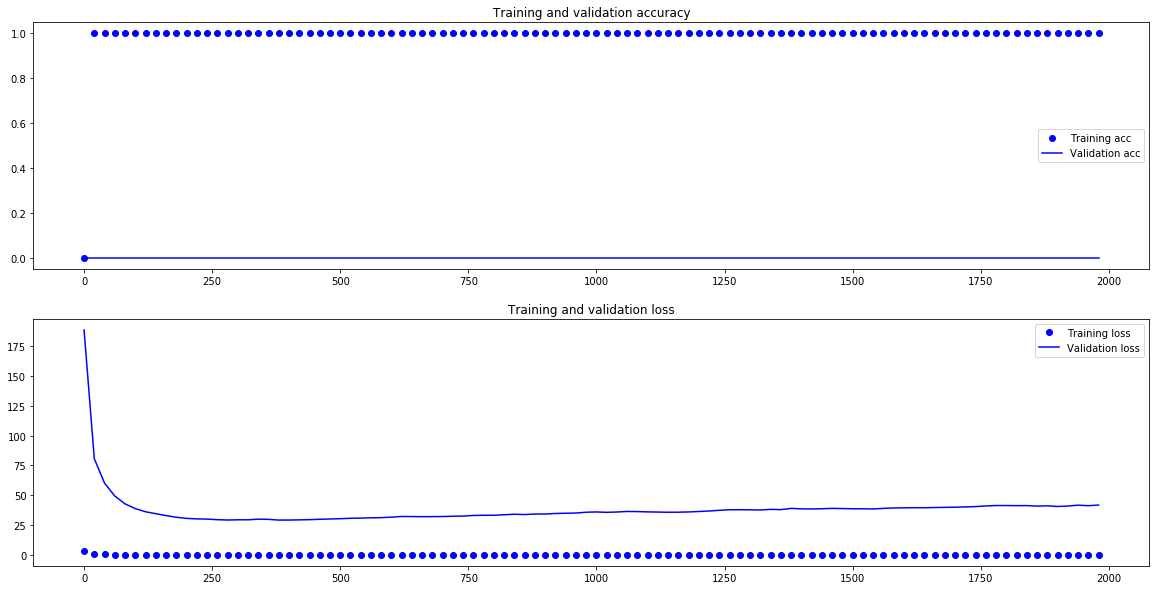

In [20]:
plot_history(history)

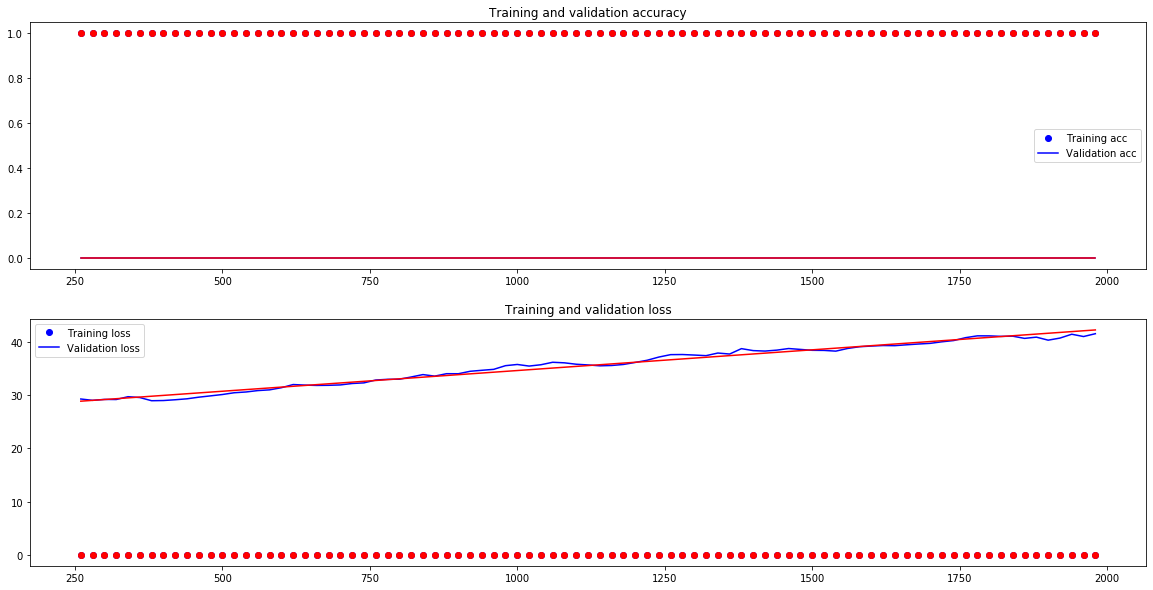

In [21]:
plot_history(history, init_phase_samples=250, plot_line=True)

In [22]:
model.save('customer-data.h5')